<a href="https://colab.research.google.com/github/CatherineRH/lab-bluemix-cf/blob/master/04-WebAPIs/B2-IBM_Watson_Natural_Language_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interacting with the IBM Watson Natural Language Understanding API; POST vs GET

Another useful API, especially when dealing with text, is the [IBM Watson  Natural Language Understanding API](https://console.bluemix.net/catalog/services/natural-language-understanding), which offers a variety of text analysis functionalities, such as sentiment analysis, entity extraction, keyword extraction, etc.

We will give a couple of examples below, to understand how we can take an unstructured piece of text (either the text alone, or a URL with text), and extract some "semi-structured" representation of its content.



## /analyze call

We will first start with the `GET /analyze` API call ([documentation](https://www.ibm.com/watson/developercloud/natural-language-understanding/api/v1/#get-analyze)), which takes as input a piece of text, and returns an analysis across various dimensions.

The call below gets as input a "text" variable, and returns back the sentiment of the text.

In [1]:
import requests
import json

# My own API key. It may run out of quota
# You can register and get your own credentials
# The ones below have a quota of 1000 calls per day 
# and can run out quickly if multiple people use these
API_KEY = 'yx39wyiwPNGm7DoDUPCSJB4SzFkr0qurARfbGYyEdaoC'

URL = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/9e683088-0d12-4399-8118-518f3e60e8c4'

In [2]:
def getSentiment(text):
    endpoint = f"{URL}/v1/analyze"
    username = "apikey"
    password = API_KEY
    
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        'text': text,
        'language' : 'en',
        # url = url_to_analyze, this is an alternative to sending the text
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
    return resp.json()

In [3]:
# We will analyze the text below using the IBM Watson API

text = '''
I got their Egg & Cheese sandwich on a Whole Wheat Everything Bagel. 
First off, I loved loved loved the texture of the bagel itself. 
It was very chewy yet soft, which is a top feature for a NY style bagel. 
However, I thought there could've been more seasoning on top of 
the bagel as I found the bagel itself to be a bit bland. 

Speaking of bland, I thought the egg and cheese filling were also quite bland. 
This was definitely lacking salt and pepper in the eggs and the cheese didn't
really add too much flavor either, which was really disappointing! 
My mom also had the same complaint with her bagel sandwich 
(she had the egg sandwich on a blueberry bagel) so I definitely wasn't 
the only one.

'''

In [9]:
data = getSentiment(text)
data

{'emotion': {'document': {'emotion': {'anger': 0.104206,
    'disgust': 0.152643,
    'fear': 0.068719,
    'joy': 0.621954,
    'sadness': 0.484095}}},
 'language': 'en',
 'sentiment': {'document': {'label': 'negative', 'score': -0.600662}},
 'usage': {'features': 2, 'text_characters': 707, 'text_units': 1}}

Now, let's try to understand the structure of the answer. First, we check the high-level keys.

In [5]:
data.keys()

dict_keys(['usage', 'sentiment', 'language', 'emotion'])

Now, let's check the content of these keys:

In [10]:
data['language']

'en'

In [11]:
data['sentiment']

{'document': {'label': 'negative', 'score': -0.600662}}

In [13]:
data['emotion']

{'document': {'emotion': {'anger': 0.104206,
   'disgust': 0.152643,
   'fear': 0.068719,
   'joy': 0.621954,
   'sadness': 0.484095}}}

In [14]:
# Let's go deeper into the 'emotion' dictionary
data['emotion']['document']

{'emotion': {'anger': 0.104206,
  'disgust': 0.152643,
  'fear': 0.068719,
  'joy': 0.621954,
  'sadness': 0.484095}}

In [12]:
# And a bit more
data['emotion']['document']['emotion']

{'anger': 0.104206,
 'disgust': 0.152643,
 'fear': 0.068719,
 'joy': 0.621954,
 'sadness': 0.484095}

### Exercise 1

Type your own piece of text, and analyze it to extract sentiment and emotions. Discuss your findings

In [21]:
my_own_text = '''
hay tres personas en la casa
'''

getSentiment( my_own_text )

{'emotion': {'document': {'emotion': {'anger': 0.070419,
    'disgust': 0.060195,
    'fear': 0.088872,
    'joy': 0.186961,
    'sadness': 0.151755}}},
 'language': 'en',
 'sentiment': {'document': {'label': 'neutral', 'score': 0}},
 'usage': {'features': 2, 'text_characters': 30, 'text_units': 1}}

### Exercise 2

Below is a slightly modified function, which takes as input a URL to analyze, instead of a piece of text. Use it to analyze a URL of your choice

In [22]:
def getSentiment_url(url_to_analyze):
    endpoint = f"{URL}/v1/analyze"
    username = "apikey"
    password = API_KEY
    
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        #'text': text,
        'language' : 'en',
        'url': url_to_analyze # this is an alternative to sending the text
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
    return resp.json()

In [23]:
url = 'https://www.espn.com/nba/story/_/id/31649049/atlanta-hawks-erase-26-point-deficit-defeat-philadelphia-76ers-take-3-2-series-lead'
getSentiment_url(url)

{'emotion': {'document': {'emotion': {'anger': 0.167777,
    'disgust': 0.096591,
    'fear': 0.122267,
    'joy': 0.521858,
    'sadness': 0.544696}}},
 'language': 'en',
 'retrieved_url': 'https://www.espn.com/nba/story/_/id/31649049/atlanta-hawks-erase-26-point-deficit-defeat-philadelphia-76ers-take-3-2-series-lead',
 'sentiment': {'document': {'label': 'negative', 'score': -0.26043}},
 'usage': {'features': 2, 'text_characters': 6507, 'text_units': 1}}

## Entities call

[Full Documentation of the call](https://www.ibm.com/watson/developercloud/natural-language-understanding/api/v1/#entities)

This is a an API call that extracts entities from the text, and also the sentiment and emotion for each of these entities.

There are two new technical aspects with this API. First of all, we use the command `requests.post` as opposed to `requests.get`. This happens because `GET` is designed to handle limited amount of data. When we have a large volume of data to send as parameters, then the HTTP protocol requires the use of the `POST` command. You will also see that the parameters that we pass are not "flat" as they used to be. Instead we submit the `watson_options` as the set of parameters, which is itself semi-structured.

In terms of natural language processing, we will examine a couple of capabilities of the API. First, you will see that there is the capability of "normalizing" each entity, so that two different ways of saying the same thing get mapped to the same entity. So for example, "President Trump" and "Donald Trump" get mapped to the same Knowledge Graph entity.

In [24]:
import requests
import json

def processURL(url_to_analyze):
    endpoint_watson = f"{URL}/v1/analyze"
    params = {
        'version': '2020-08-01',
    }
    headers = { 
        'Content-Type': 'application/json',
    }
    watson_options = {
      "url": url_to_analyze,
      "features": {
        "entities": {
          "sentiment": True,
          "emotion": True,
          "limit": 10
        }
      }
    }
    username = "apikey"
    password = API_KEY

    resp = requests.post(endpoint_watson, 
                         data=json.dumps(watson_options), 
                         headers=headers, 
                         params=params, 
                         auth=(username, password) 
                        )
    return resp.json()

In [25]:
url_to_analyze = 'https://www.reuters.com/technology/us-defended-amazon-after-article-showed-company-bypassed-indian-law-2021-05-21/'

data = processURL(url_to_analyze)

In [26]:
data

{'entities': [{'confidence': 1,
   'count': 14,
   'disambiguation': {'dbpedia_resource': 'http://dbpedia.org/resource/Reuters',
    'name': 'Reuters'},
   'emotion': {'anger': 0.118538,
    'disgust': 0.142123,
    'fear': 0.090705,
    'joy': 0.185451,
    'sadness': 0.52341},
   'relevance': 0.960286,
   'sentiment': {'label': 'negative', 'mixed': '1', 'score': -0.648653},
   'text': 'Reuters',
   'type': 'Company'},
  {'confidence': 1,
   'count': 21,
   'disambiguation': {'dbpedia_resource': 'http://dbpedia.org/resource/Amazon.com',
    'name': 'Amazon.com'},
   'emotion': {'anger': 0.127601,
    'disgust': 0.107367,
    'fear': 0.075236,
    'joy': 0.149825,
    'sadness': 0.528366},
   'relevance': 0.899384,
   'sentiment': {'label': 'negative', 'mixed': '1', 'score': -0.488999},
   'text': 'Amazon',
   'type': 'Company'},
  {'confidence': 1,
   'count': 6,
   'disambiguation': {'dbpedia_resource': 'http://dbpedia.org/resource/Office_of_the_United_States_Trade_Representative',
 

In [27]:
# Let's see what we get back as top-level attributes
data.keys()

dict_keys(['usage', 'retrieved_url', 'language', 'entities'])

In [28]:
# Let' see the entities list
data["entities"]

[{'confidence': 1,
  'count': 14,
  'disambiguation': {'dbpedia_resource': 'http://dbpedia.org/resource/Reuters',
   'name': 'Reuters'},
  'emotion': {'anger': 0.118538,
   'disgust': 0.142123,
   'fear': 0.090705,
   'joy': 0.185451,
   'sadness': 0.52341},
  'relevance': 0.960286,
  'sentiment': {'label': 'negative', 'mixed': '1', 'score': -0.648653},
  'text': 'Reuters',
  'type': 'Company'},
 {'confidence': 1,
  'count': 21,
  'disambiguation': {'dbpedia_resource': 'http://dbpedia.org/resource/Amazon.com',
   'name': 'Amazon.com'},
  'emotion': {'anger': 0.127601,
   'disgust': 0.107367,
   'fear': 0.075236,
   'joy': 0.149825,
   'sadness': 0.528366},
  'relevance': 0.899384,
  'sentiment': {'label': 'negative', 'mixed': '1', 'score': -0.488999},
  'text': 'Amazon',
  'type': 'Company'},
 {'confidence': 1,
  'count': 6,
  'disambiguation': {'dbpedia_resource': 'http://dbpedia.org/resource/Office_of_the_United_States_Trade_Representative',
   'name': 'Office_of_the_United_States_Tr

In [32]:
# Let' see the third entity. Notice the "disambiguated" attribute that
# points to "canonical" versions of the entity, in DBPedia
# Notice that USTR is the actual term used in the text
data["entities"][2]

{'confidence': 1,
 'count': 6,
 'disambiguation': {'dbpedia_resource': 'http://dbpedia.org/resource/Office_of_the_United_States_Trade_Representative',
  'name': 'Office_of_the_United_States_Trade_Representative'},
 'emotion': {'anger': 0.12627,
  'disgust': 0.130586,
  'fear': 0.080373,
  'joy': 0.214196,
  'sadness': 0.146954},
 'relevance': 0.886156,
 'sentiment': {'label': 'negative', 'score': -0.668469},
 'text': 'USTR',
 'type': 'Organization'}

In [33]:
import pandas as pd
pd.json_normalize(data["entities"])

,type,text,relevance,count,confidence,sentiment.score,sentiment.mixed,sentiment.label,emotion.sadness,emotion.joy,emotion.fear,emotion.disgust,emotion.anger,disambiguation.name,disambiguation.dbpedia_resource,disambiguation.subtype
0,Company,Reuters,0.960286,14,1.000000,-0.648653,1,negative,0.523410,0.185451,0.090705,0.142123,0.118538,Reuters,http://dbpedia.org/resource/Reuters,NaN
1,Company,Amazon,0.899384,21,1.000000,-0.488999,1,negative,0.528366,0.149825,0.075236,0.107367,0.127601,Amazon.com,http://dbpedia.org/resource/Amazon.com,NaN
2,Organization,USTR,0.886156,6,1.000000,-0.668469,NaN,negative,0.146954,0.214196,0.080373,0.130586,0.126270,Office_of_the_United_States_Trade_Representative,http://dbpedia.org/resource/Office_of_the_Unit...,NaN
3,Location,India,0.758433,15,1.000000,-0.653719,1,negative,0.520122,0.165026,0.081817,0.127931,0.121049,India,http://dbpedia.org/resource/India,"[HumanLanguage, Region, Country, GovernmentalJ..."
4,Location,U.S.,0.692772,11,1.000000,-0.543674,1,negative,0.522817,0.171299,0.093509,0.124767,0.123109,United_States,http://dbpedia.org/resource/United_States,"[Region, AdministrativeDivision, Country, Gove..."
5,Organization,U.S. embassy,0.544092,2,0.911763,-0.562406,NaN,negative,0.321459,0.271568,0.053940,0.170868,0.086842,NaN,NaN,NaN
6,Person,Kerry,0.529728,6,1.000000,-0.768336,NaN,negative,0.221768,0.191568,0.097944,0.164208,0.106676,NaN,NaN,NaN
7,Organization,CCI,0.367866,4,0.996902,0.000000,NaN,neutral,0.231586,0.053873,0.044168,0.132963,0.160644,NaN,NaN,NaN
8,Person,Goyal,0.351436,2,0.973075,-0.768073,NaN,negative,0.286689,0.095890,0.069583,0.391671,0.117411,NaN,NaN,NaN
9,Person,President Joe Biden,0.348250,1,0.562070,-0.591469,NaN,negative,0.101353,0.306054,0.101406,0.134322,0.237940,NaN,NaN,NaN


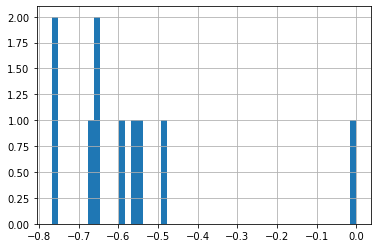

In [40]:
pd.json_normalize(data["entities"])['sentiment.score'].hist(bins=50)

In [34]:
entity_table = pd.json_normalize(data["entities"])

In [36]:
entity_table

,type,text,relevance,count,confidence,sentiment.score,sentiment.mixed,sentiment.label,emotion.sadness,emotion.joy,emotion.fear,emotion.disgust,emotion.anger,disambiguation.name,disambiguation.dbpedia_resource,disambiguation.subtype
0,Company,Reuters,0.960286,14,1.000000,-0.648653,1,negative,0.523410,0.185451,0.090705,0.142123,0.118538,Reuters,http://dbpedia.org/resource/Reuters,NaN
1,Company,Amazon,0.899384,21,1.000000,-0.488999,1,negative,0.528366,0.149825,0.075236,0.107367,0.127601,Amazon.com,http://dbpedia.org/resource/Amazon.com,NaN
2,Organization,USTR,0.886156,6,1.000000,-0.668469,NaN,negative,0.146954,0.214196,0.080373,0.130586,0.126270,Office_of_the_United_States_Trade_Representative,http://dbpedia.org/resource/Office_of_the_Unit...,NaN
3,Location,India,0.758433,15,1.000000,-0.653719,1,negative,0.520122,0.165026,0.081817,0.127931,0.121049,India,http://dbpedia.org/resource/India,"[HumanLanguage, Region, Country, GovernmentalJ..."
4,Location,U.S.,0.692772,11,1.000000,-0.543674,1,negative,0.522817,0.171299,0.093509,0.124767,0.123109,United_States,http://dbpedia.org/resource/United_States,"[Region, AdministrativeDivision, Country, Gove..."
5,Organization,U.S. embassy,0.544092,2,0.911763,-0.562406,NaN,negative,0.321459,0.271568,0.053940,0.170868,0.086842,NaN,NaN,NaN
6,Person,Kerry,0.529728,6,1.000000,-0.768336,NaN,negative,0.221768,0.191568,0.097944,0.164208,0.106676,NaN,NaN,NaN
7,Organization,CCI,0.367866,4,0.996902,0.000000,NaN,neutral,0.231586,0.053873,0.044168,0.132963,0.160644,NaN,NaN,NaN
8,Person,Goyal,0.351436,2,0.973075,-0.768073,NaN,negative,0.286689,0.095890,0.069583,0.391671,0.117411,NaN,NaN,NaN
9,Person,President Joe Biden,0.348250,1,0.562070,-0.591469,NaN,negative,0.101353,0.306054,0.101406,0.134322,0.237940,NaN,NaN,NaN


In [ ]:
# This function takes as input the result
# from the IBM Watson API and returns a list
# of entities that are relevant (above threshold)
# to the article
def getEntities(data, threshold):
    result = []
    for entity in data["entities"]:
        relevance = float(entity['relevance'])
        if relevance > threshold:
            result.append(entity['text'])
    return result

getEntities(data, 0.25)

### Exercise

* First of all, **get your own credentials for the IBM Watson API**. The demo key that we use above has a limited quota.
* Use an API to get news articles. 
    * Option 1: Use the API at https://newsapi.org to fetch the news from various sources. Print the entities that are currently being discussed in the news, together with their relevance value and the associated sentiment.
    * Option 2: Use the NY Times API to fetch the Top Stories News. You can register and get an API key at https://developer.nytimes.com/. The `Top Stories V2 API` provides the details of the news of the day: (The API call documentation is at https://developer.nytimes.com/docs/top-stories-product/1/overview and the API Call is  https://api.nytimes.com/svc/topstories/v2/home.json?api-key=PUTYOURKEYHERE). Repeat the entity extraction process from above.
    * Option 3: Use the Guardian API at https://open-platform.theguardian.com/documentation/ to fetch news from The Guardian.


get the news, get the sentiment analysis, and get the sentiment analysis. you can copy paste from news notebook (code to give back the news) and fore ach article write the loop to send to ibm and keep results and the ibm watson (need api key and the get sentiment
)

In [57]:
import requests
newsapi_key = '1dd3e90294f944c98f653a218f3a8ff4'
endpoint = 'https://newsapi.org/v2/top-headlines'
parameters = {
    'country' : 'us',
    'category' : 'business',
    'apiKey' : newsapi_key,
    'pageSize' : 100
}
resp = requests.get(endpoint, params=parameters)
news = resp.json()

In [ ]:
API_KEY = 'yx39wyiwPNGm7DoDUPCSJB4SzFkr0qurARfbGYyEdaoC'
URL = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/9e683088-0d12-4399-8118-518f3e60e8c4'
def getSentiment(text):
    endpoint = f"{URL}/v1/analyze"
    username = "apikey"
    password = API_KEY
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        'text': text,
        'language' : 'en',
        # url = url_to_analyze, this is an alternative to sending the text
    }
    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    return resp.json()

# If you prefer to analyze a URL instead of text
def getSentiment_url(url_to_analyze):
    endpoint = f"{URL}/v1/analyze"
    username = "apikey"
    password = API_KEY
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        #'text': text,
        'language' : 'en',
        'url': url_to_analyze # this is an alternative to sending the text
    }
    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    return resp.json()

In [60]:
import pandas as pd
results=[]
for article in news['articles']:
  title = article['title']
  response = getSentiment(title)
  sentiment = response['sentiment']['document']['score']
  print(title)
  print(sentiment)
  print("=========")
  entry = {
      "text": title,
      "sentiment": sentiment
  }
  results.append(entry)

To stop the ransomware pandemic, start with the basics - The Economist
-0.69179
Lordstown Motors admits that electric truck orders aren't 'firm purchase commitments' - Yahoo Finance
0
Commodities from copper to corn tumble on China crackdown, rising dollar - CNBC
-0.576957
ETFs to turn to as Fed sets stock market up for rising interest rates; GameStop heads to IWF - MarketWatch
-0.65138
Financial advisors shrug off Fed's inflation, interest rate forecasts - CNBC
-0.872142
Five metros with the biggest home-price increases according to Redfin - Fox Business
0
Supreme Court says chocolate companies cannot be sued over child slavery on African cocoa farms - The Washington Post
0
It's your duty as an American to devour these 15 million extra Girl Scout cookies, goddamnit - The A.V. Club
0.295702
Mortgage rates shoot higher after Fed Chairman Powell's comments - CNBC
0
Area Ex-President Still Yelling About How Wind Turbines Will Kill Us All - Gizmodo
-0.875441
Ochsner Health to take over 7-h

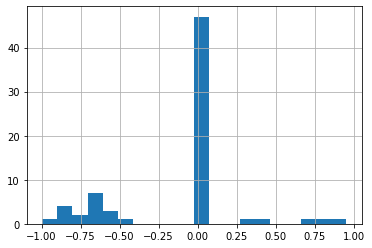

In [61]:
df = pd.DataFrame(results)
df["sentiment"].hist(bins=20)